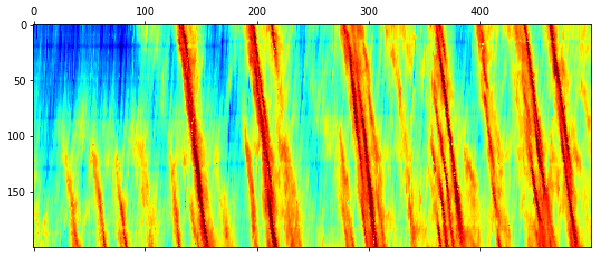

In [3]:
from functions import *
path = '..//data//NGSIM//npy//'
full = np.load(path+'speed_grid_full.npy')
full = fill_nan(full)
plt.matshow(full, cmap='jet_r')

In [4]:
r_list = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
i_list = list(range(10))
# i_list = [1, 2]

np.random.seed(0)
for r in r_list:
    for i in i_list:
        maxiter = 1500
        observed = np.load(path+f'speed_grid_{r}_{i}.npy')
        mask = ~np.isnan(observed)
        n = min(max(int((~np.isnan(observed)).sum() * 0.02), 100), 500)  # number of inducing points
        rx = np.random.uniform(low=0, high=full.shape[1], size=(n,1))
        ry = np.random.uniform(low=0, high=full.shape[0], size=(n,1))
        # plt.matshow(full, cmap='jet_r')

        train_X = np.where(mask == 1)
        train_Y = observed[train_X].reshape(-1, 1)
        train_X = np.concatenate([x.reshape([-1, 1]) for x in train_X], axis = 1)
        train_X = train_X.astype(np.float64)

        mean_Y = np.mean(train_Y)
        std_Y = np.std(train_Y)
        train_Y  = (train_Y - mean_Y) / std_Y  # standardize
        vmax = full.max()
        vmin = full.min()

#         Z = np.random.permutation(train_X)[:n, :]  # inducing inputs
        Z = np.concatenate([ry, rx], axis=1).astype(np.float64)  # inducing inputs
      #   kernel = gpflow.kernels.Matern52(lengthscales=[150.0, 13.0], variance=0.2)
        kernel = Directional_Kernel(Matern52, lengthscales=[150, 8], theta=0.1, variance=0.2)
        model = gpflow.models.SGPR(data=(train_X, train_Y), kernel=kernel, mean_function=None,
                                   inducing_variable=Z, noise_variance=0.02)
        time0 = time.time()
        opt = gpflow.optimizers.Scipy()
        opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=maxiter))

        # define monitor
        test_name = f"r{r}_i{i}_{model.kernel.name}_N{n}_maxiter{maxiter}"

        # Examine the results
        test_X = np.where(full >= 0)
        test_X = np.concatenate([x.reshape([-1, 1]) for x in test_X], axis=1)
        test_X = test_X.astype(np.float64)
        test_Y = model.predict_y(test_X)[0]

        predicted_Y = test_Y.numpy().reshape(full.shape) * std_Y + mean_Y
        predicted_Y2 = predicted_Y.copy()  # The prediction with observed location unchanged
        predicted_Y2[mask] = observed[mask]

        train_mae = mae(predicted_Y[mask], full[mask])
        train_rmse = rmse(predicted_Y[mask], full[mask])
        test_mae = mae(predicted_Y, full)
        test_rmse = rmse(predicted_Y, full)
        test_mae2 = mae(predicted_Y2, full)
        test_rmse2 = rmse(predicted_Y2, full)

        print(f'{test_name}. theta: {model.kernel.theta.numpy():.3f}, n:{n},'
              f'lengthscale: {model.kernel.lengthscale.numpy()}, likelihood: {model.likelihood.variance.numpy()}, time: {time.time()-time0:.3f}')
        print(f'Train mae: {train_mae:.3f}, rmse: {train_rmse:.3f}. Test mae: {test_mae:.3f}, rmse: {test_rmse:.3f}. '
              f'Test mae2: {test_mae2:.3f}, rmse2: {test_rmse2:.3f}.')

        # Save the model
        save_pickle(gpflow.utilities.parameter_dict(model), f'./{test_name}.pkl')

2023-02-18 04:33:44.527991: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 04:33:44.530101: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 04:33:44.530835: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 04:33:44.531752: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

r0.05_i0_Directional_Matern52_N240_maxiter1500. theta: 0.092, n:240,lengthscale: [103.2645266    7.42677744], likelihood: 0.08552700713657344, time: 34.717
Train mae: 2.675, rmse: 3.606. Test mae: 4.710, rmse: 6.388. Test mae2: 4.587, rmse2: 6.345.
r0.05_i1_Directional_Matern52_N230_maxiter1500. theta: 0.100, n:230,lengthscale: [97.25502273  6.56929062], likelihood: 0.08014901595936302, time: 27.998
Train mae: 2.577, rmse: 3.375. Test mae: 4.881, rmse: 6.621. Test mae2: 4.770, rmse2: 6.573.
r0.05_i2_Directional_Matern52_N216_maxiter1500. theta: 0.083, n:216,lengthscale: [86.59341187  7.58427228], likelihood: 0.09104480629188988, time: 25.696
Train mae: 3.039, rmse: 4.197. Test mae: 5.364, rmse: 7.375. Test mae2: 5.249, rmse2: 7.343.
r0.05_i3_Directional_Matern52_N217_maxiter1500. theta: 0.117, n:217,lengthscale: [240.450259    10.00207318], likelihood: 0.09474666326438665, time: 26.606
Train mae: 2.909, rmse: 3.792. Test mae: 4.673, rmse: 6.159. Test mae2: 4.550, rmse2: 6.099.
r0.05_i4